In [1]:
#import libraries here
import pandas as pd
import matplotlib.pyplot as plt

Load csv file and perform data wrangling - Inspect shape, data types, and missing values

The data lacks missing values which we should drop or impute as shown below.

In [2]:
#read csv
df= pd.read_csv("./boston.csv")
#Inspect df
print("Shape:", df.shape)
print(df.info())
df.head()

Shape: (506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
#replace column names for readability
new_column_names= ["Crime rate", "Land zoned", "Non-retail business", "Charles river", "Nitric oxide conc", "Number of rooms", "Age", "Weighted distances", "Radial highways", "Tax rate", "Pupil-teacher ratio", "Proportion of blacks", "Lower status","value of homes"]
df.columns=new_column_names
df.head()

,Crime rate,Land zoned,Non-retail business,Charles river,Nitric oxide conc,Number of rooms,Age,Weighted distances,Radial highways,Tax rate,Pupil-teacher ratio,Proportion of blacks,Lower status,value of homes
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df[["Crime rate", "Number of rooms", "Age", "Proportion of blacks", "value of homes"]].describe()

,Crime rate,Number of rooms,Age,Proportion of blacks,value of homes
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,6.284634,68.574901,356.674032,22.532806
std,8.601545,0.702617,28.148861,91.294864,9.197104
min,0.006320,3.561000,2.900000,0.320000,5.000000
25%,0.082045,5.885500,45.025000,375.377500,17.025000
50%,0.256510,6.208500,77.500000,391.440000,21.200000
75%,3.677083,6.623500,94.075000,396.225000,25.000000
max,88.976200,8.780000,100.000000,396.900000,50.000000


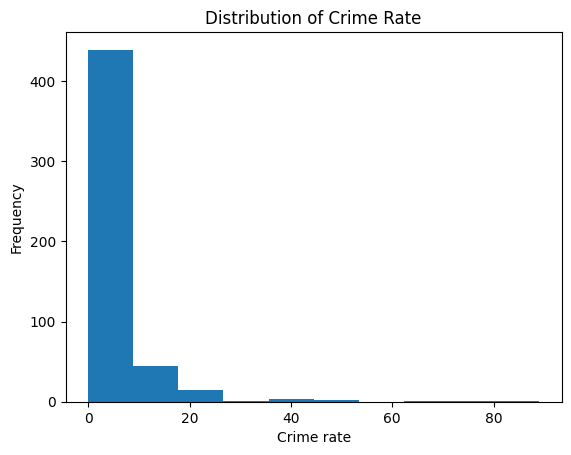

In [5]:
#histogram for crime rate
fig = plt.hist(df["Crime rate"])
plt.xlabel("Crime rate")
plt.ylabel('Frequency')
plt.title("Distribution of Crime Rate");

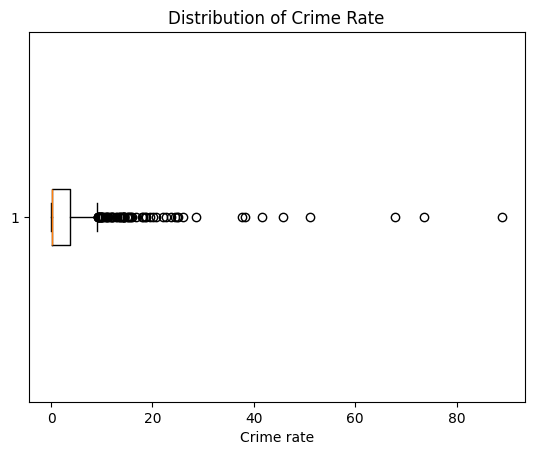

In [6]:
#boxplot- crime rate
fig=plt.boxplot(df["Crime rate"], vert=False)
plt.xlabel("Crime rate")
plt.title("Distribution of Crime Rate");

From the charts above, most of the crime rate observations are between 0-20. Boxplot visualizations reveals high number of outliers. If not removed, these could advaersely impact the performance of machine learning model such as linear regression. Overall, the crime rate data is skewed to the right. Evidently, the visuals reflect the difference between the mean and median for the column. We find if the above observations hold true for number of rooms.

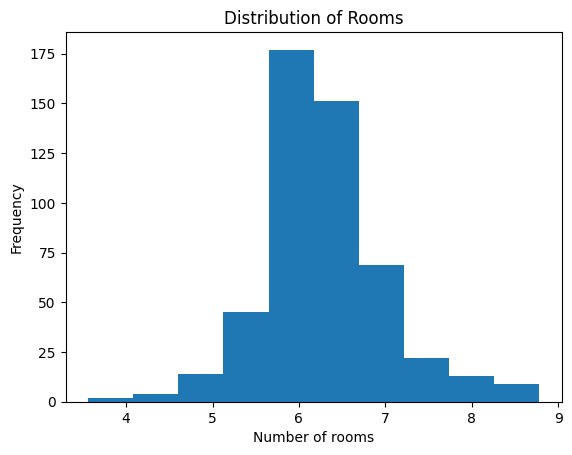

In [7]:
#histogram for number of rooms
fig = plt.hist(df["Number of rooms"])
plt.xlabel("Number of rooms")
plt.ylabel('Frequency')
plt.title("Distribution of Rooms");

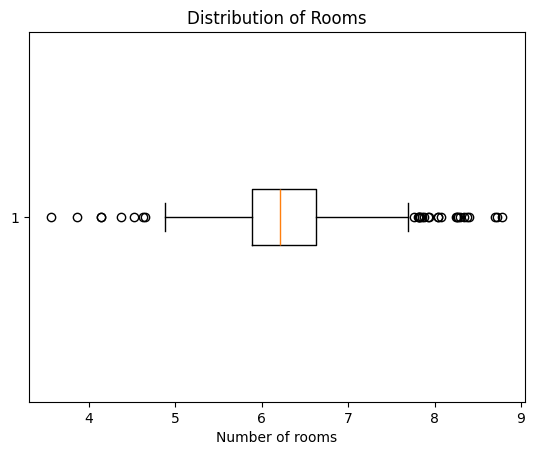

In [8]:
fig = plt.boxplot(df["Number of rooms"], vert=False)
plt.xlabel("Number of rooms")
plt.title("Distribution of Rooms");

Data on the number of rooms appears to be normally distributed based on the histogram above. It appears that most of the boston houses have 6 rooms. The boxplot makes similar conclusions. Strikingly, the data had nearly the same mean and median. 

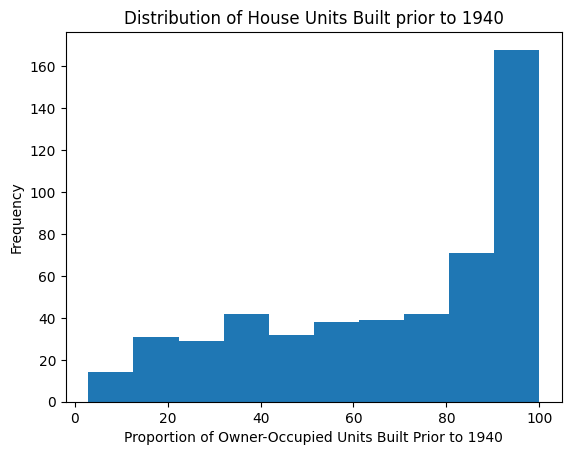

In [9]:
#histogram for age of buildings
fig = plt.hist(df["Age"])
plt.xlabel("Proportion of Owner-Occupied Units Built Prior to 1940")
plt.ylabel('Frequency')
plt.title("Distribution of House Units Built prior to 1940");

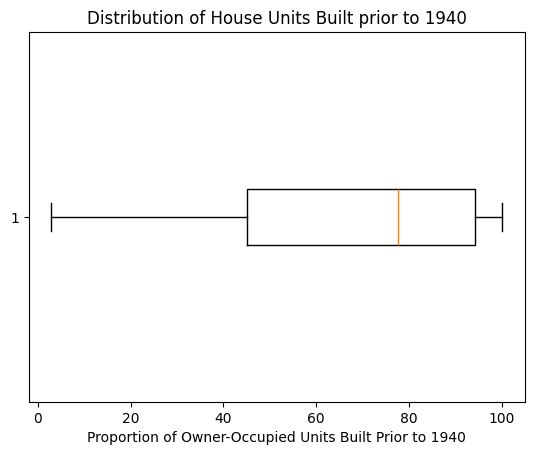

In [10]:
#Boxplot for age of buildings
fig = plt.boxplot(df["Age"], vert=False)
plt.xlabel("Proportion of Owner-Occupied Units Built Prior to 1940")
plt.title("Distribution of House Units Built prior to 1940");

The age of units built prior to 1940 is left skewed. The median age of the units is greater than the mean age of units.

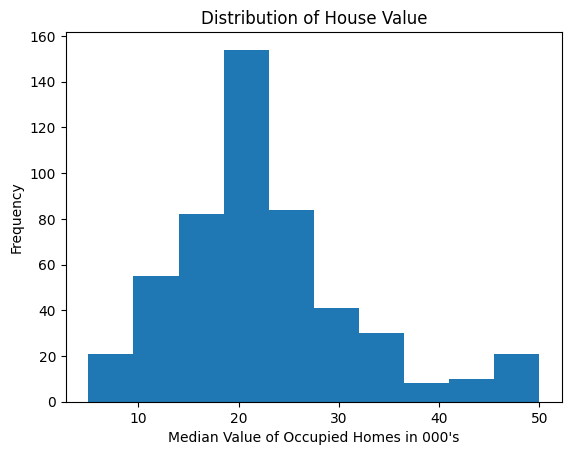

In [11]:
#histogram for value of homes
fig = plt.hist(df["value of homes"])
plt.xlabel("Median Value of Occupied Homes in 000's")
plt.ylabel('Frequency')
plt.title("Distribution of House Value");

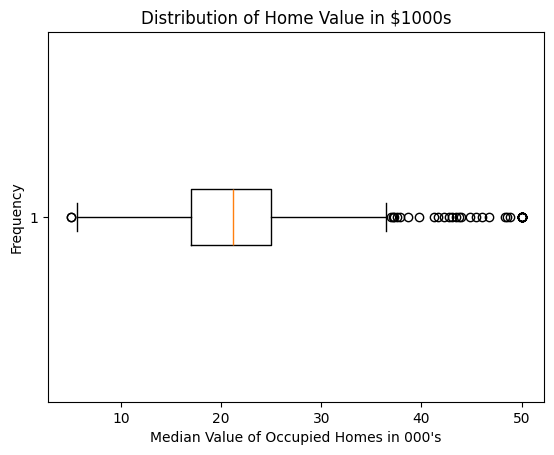

In [12]:
#Boxplot for value of homes
fig = plt.boxplot(df["value of homes"], vert=False)
plt.xlabel("Median Value of Occupied Homes in 000's")
plt.ylabel('Frequency')
plt.title("Distribution of Home Value in $1000s");

Most home units are worth around $20,000. A number of units are worth excess of $35,000. The median value of homes is skewed to the right.

We now find the relationship between the variables between pairs of the variables keeping in mind the value of homes is what we need to predict. 

In [13]:
#crime rate
correlation_value_vs_crime= df["value of homes"].corr(df["Crime rate"])
print(f'correlation: home value_vs_crime" = {correlation_value_vs_crime}')

correlation: home value_vs_crime" = -0.38830460858681154


In [14]:
#Number of rooms
correlation_value_vs_rooms= df["value of homes"].corr(df["Number of rooms"])
print(f'correlation: home value vs number of rooms" = {correlation_value_vs_rooms}')

correlation: home value vs number of rooms" = 0.695359947071539


In [15]:
#Age "
correlation_value_vs_age= df["value of homes"].corr(df["Age"])
print(f'correlation: home value vs age" = {correlation_value_vs_age}')

correlation: home value vs age" = -0.3769545650045962


In [16]:
#Proportion of blacks
correlation_value_vs_proportion_of_blacks= df["value of homes"].corr(df["Proportion of blacks"])
print(f'correlation: home value vs proportion of blacks" = {correlation_value_vs_proportion_of_blacks}')

correlation: home value vs proportion of blacks" = 0.3334608196570665


we see that home value is positively correlated with the number of rooms. we can proceed with prediction. for now, we consider median value of homes and number of rooms given the high correlation. In the next file.

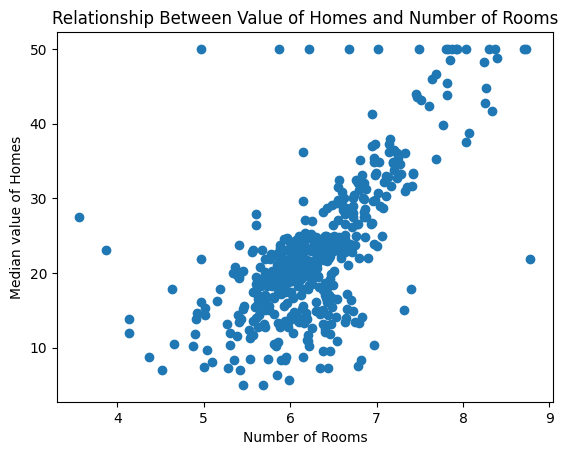

In [17]:
#scatter plot
plt.scatter(x=df["Number of rooms"], y=df["value of homes"])
#add labels
plt.xlabel("Number of Rooms")
plt.ylabel("Median value of Homes")
#add title
plt.title("Relationship Between Value of Homes and Number of Rooms");

In [20]:
#to csv
df_cleaned = df
df_cleaned.head()

,Crime rate,Land zoned,Non-retail business,Charles river,Nitric oxide conc,Number of rooms,Age,Weighted distances,Radial highways,Tax rate,Pupil-teacher ratio,Proportion of blacks,Lower status,value of homes
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [22]:
df_cleaned.to_csv("./boston_cleaned.csv", index=False)